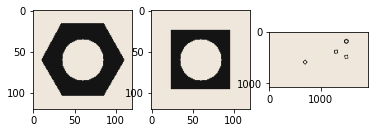

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\EN2550_assignment3\img\hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\EN2550_assignment3\img\squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\EN2550_assignment3\img\conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()


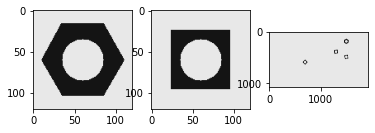

In [3]:
hexnut_template = cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\EN2550_assignment3\img\hexnut_template.png', cv.IMREAD_GRAYSCALE)
squarenut_template =  cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\EN2550_assignment3\img\squarenut_template.png', cv.IMREAD_GRAYSCALE)
conveyor_f100 =  cv.imread(r'C:\Users\ASUS\Documents\coding\image processing\EN2550_assignment3\img\conveyor_f100.png', cv.IMREAD_GRAYSCALE)
fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Threshold 1= 20.0
Threshold 2= 20.0
Threshold 3= 20.0


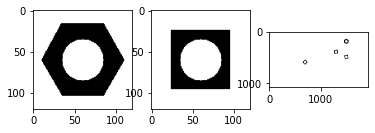

In [4]:
ret1,th1 = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,th2 = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,th3 = cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print('Threshold 1=',ret1)
print('Threshold 2=',ret2)
print('Threshold 3=',ret3)
plt. subplot(1,3,1)
plt.imshow(th1,'gray')
plt. subplot(1,3,2)
plt.imshow(th2,'gray')
plt. subplot(1,3,3)
plt.imshow(th3,'gray')




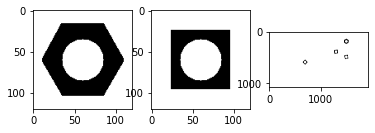

In [5]:
kernel=np.ones((3,3),np.uint8)
closing1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closing2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)
plt. subplot(1,3,1)
plt.imshow(closing1,'gray')
plt. subplot(1,3,2)
plt.imshow(closing2,'gray')
plt. subplot(1,3,3)
plt.imshow(closing3,'gray')

Image 1 number of connected components: 3
Image 2 number of connected components: 3
Image 3 number of connected components: 6


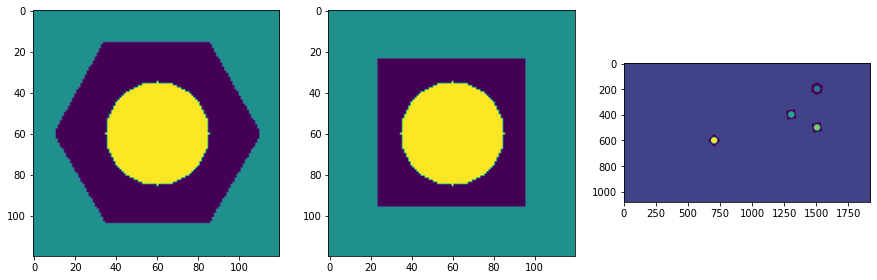

In [6]:
connectivity=4
connected=[]
connected.append(cv.connectedComponentsWithStats(closing1, connectivity, cv.CV_32S))
connected.append(cv.connectedComponentsWithStats(closing2, connectivity, cv.CV_32S))
connected.append(cv.connectedComponentsWithStats(closing3, connectivity, cv.CV_32S))

fig, ax = plt. subplots(1,3,figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(connected[i][1])
    
    print('Image',i+1,'number of connected components:',connected[i][0])
    

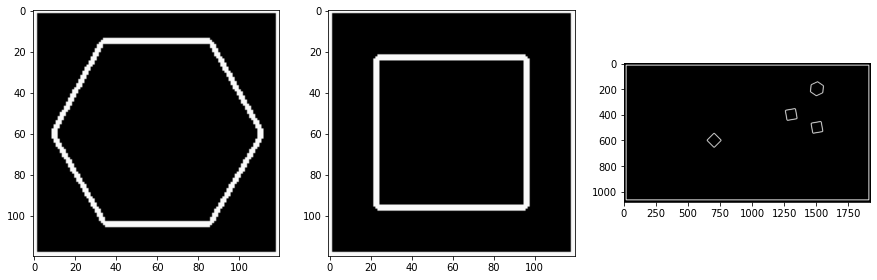

In [42]:
contours=[]
contours1=cv.findContours(closing1, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)[0]
contours2=cv.findContours(closing2, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)[0]
contours3=cv.findContours(closing3, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)[0]

out1=np.zeros_like(closing1)
out2=np.zeros_like(closing2)
out3=np.zeros_like(closing3)


for i in contours1:
    if cv.contourArea(i) > 6000:
            contourImg1=cv.drawContours(out1, i, -1, (249,4,238), 2)
for i in contours2:
    if cv.contourArea(i) > 5000:
            contourImg2=cv.drawContours(out2, i, -1, (249,4,238), 2)
for i in contours3:
    if cv.contourArea(i) > 4000:
            contourImg3=cv.drawContours(out3, i, -1, (249,4,238), 5)



contourImg1=cv.cvtColor(contourImg1, cv.COLOR_RGB2BGR)
contourImg2=cv.cvtColor(contourImg2, cv.COLOR_RGB2BGR)
contourImg3=cv.cvtColor(contourImg3, cv.COLOR_RGB2BGR)
fig, ax = plt. subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(contourImg1)
plt.subplot(1,3,2)
plt.imshow(contourImg2)
plt.subplot(1,3,3)
plt.imshow(contourImg3)

In [44]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

In [52]:
outcontours1=[]
outcontours2=[]
outcontours3=[]
for i in contours1:
    if cv.contourArea(i) > 6000:
        outcontours1.append(i)

for i in contours2:
    if cv.contourArea(i) > 5000:
        outcontours2.append(i)

for i in contours3:
    if cv.contourArea(i) > 4000:
        outcontours3.append(i)
matches=0
for j in outcontours3:
    if cv.matchShapes(outcontours1[0],j,1,0.0)<0.02:
        matches+=1
print( ' number of matching hexagonal nuts:',matches )


 number of matching hexagonal nuts: 1


In [2]:
import cv2 as cv
def object_count(frame, f,):
    global total
    currentCount = 0
    leftCenters = []
    rightCenters = []
    outContours = []

    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray, (5,5), 0)
    a,th = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU) 
    bitnotImg = cv.bitwise_not(th)
    contours, hierarchy = cv.findContours(bitnotImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    for i in range(0, len(contours)):
        area = cv.contourArea(contours[i])
        if area > 4500 and area < 7000:
            outContours.append(contours[i])
    
    for i in outContours:
        M = cv.moments(i)
        cx = int(M['m10']/M['m00'])

        if (1000-cx) >= 0:
            leftCenters.append(cx)
        else:
            rightCenters.append(cx)
    for i in leftCenters:
        if 1000-i < 10:
            currentCount+= 1
            total+= 1
    
    text1 = 'Frame:' + str(f)
    text2 = 'Count of objects in the current frame:' + str(currentCount)
    text3 = 'Total count of objects:' + str(total)
    cv.putText(frame,text1 , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1, cv.LINE_AA)
    cv.putText(frame,text2 , (100, 130), cv.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1, cv.LINE_AA)
    cv.putText(frame,text3 , (100, 160), cv.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 1, cv.LINE_AA)

    return frame

# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here
total = 0
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []
     
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    frame_array.append(object_count(frame, f))

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

out = cv.VideoWriter('./conveyor_result_190535D.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
